In [3]:
import numpy as np
import pandas as pd
import os
import featuretools as ft
import featuretools.variable_types as vtypes

In [5]:
os.chdir('c:\\Users\\Artem\\Desktop\\neural networks\\HTRU2')
os.getcwd()

'c:\\Users\\Artem\\Desktop\\neural networks\\HTRU2'

In [6]:
data = pd.read_csv('HTRU_2.csv', header=None)
column_names = pd.read_csv('columns_names.txt',sep=" ", header=None)
data.columns = ["MeanIP","StdIP","ExckurtIP","SkewIP","MeanDMSNR","StdDMSNR","ExckurtDMSNR","SkewDMSNR", "class"]

In [7]:
data.columns = data.columns.map(str)

In [8]:
del data['class'] #удаляется последняя колонка с ответами для feature engeneering

In [9]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'pulsars')
# adding a dataframe 
es.entity_from_dataframe(entity_id = 'signals', dataframe = data, index='number')

2020-05-06 00:39:02,413 featuretools.entityset - WARNING    index number not found in dataframe, creating new integer column


Entityset: pulsars
  Entities:
    signals [Rows: 17898, Columns: 9]
  Relationships:
    No relationships

In [10]:
es["signals"].variables 

[<Variable: number (dtype = index)>,
 <Variable: MeanIP (dtype = numeric)>,
 <Variable: StdIP (dtype = numeric)>,
 <Variable: ExckurtIP (dtype = numeric)>,
 <Variable: SkewIP (dtype = numeric)>,
 <Variable: MeanDMSNR (dtype = numeric)>,
 <Variable: StdDMSNR (dtype = numeric)>,
 <Variable: ExckurtDMSNR (dtype = numeric)>,
 <Variable: SkewDMSNR (dtype = numeric)>]

In [11]:
feature_matrix, feature_names=ft.dfs(entityset=es, target_entity = 'signals',max_depth = 2, verbose = 3, n_jobs = 1)
feature_matrix.head() #при первой попытке генрации признаков(при "no relationships" ничего не сгенерировалось)

Built 8 features
Elapsed: 00:00 | Progress: 100%|██████████


,MeanIP,StdIP,ExckurtIP,SkewIP,MeanDMSNR,StdDMSNR,ExckurtDMSNR,SkewDMSNR
number,,,,,,,,
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [14]:
es = es.normalize_entity(base_entity_id='signals', new_entity_id='MeanDMSNR', index='MeanDMSNR') #создаём relationship: выделяем приоритетный столбец

2020-05-06 00:39:43,212 featuretools.entityset - WARNING    Not adding duplicate relationship: <Relationship: signals.MeanDMSNR -> MeanDMSNR.MeanDMSNR>


In [15]:
print(es)

Entityset: pulsars
  Entities:
    signals [Rows: 17898, Columns: 9]
    MeanDMSNR [Rows: 9000, Columns: 1]
  Relationships:
    signals.MeanDMSNR -> MeanDMSNR.MeanDMSNR


In [19]:
feature_matrix, feature_names=ft.dfs(entityset=es, target_entity = 'signals',max_depth = 2, verbose = 3, n_jobs = 1)
feature_matrix.head(10)

Built 51 features
Elapsed: 00:04 | Progress: 100%|██████████


,MeanIP,StdIP,ExckurtIP,SkewIP,MeanDMSNR,StdDMSNR,ExckurtDMSNR,SkewDMSNR,MeanDMSNR.SUM(signals.ExckurtIP),MeanDMSNR.SUM(signals.StdDMSNR),...,MeanDMSNR.MIN(signals.StdIP),MeanDMSNR.MIN(signals.SkewIP),MeanDMSNR.MEAN(signals.ExckurtIP),MeanDMSNR.MEAN(signals.StdDMSNR),MeanDMSNR.MEAN(signals.SkewDMSNR),MeanDMSNR.MEAN(signals.MeanIP),MeanDMSNR.MEAN(signals.ExckurtDMSNR),MeanDMSNR.MEAN(signals.StdIP),MeanDMSNR.MEAN(signals.SkewIP),MeanDMSNR.COUNT(signals)
number,,,,,,,,,,,,,,,,,,,,,
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,1.517650,99.127932,...,40.508439,-0.699648,0.303530,19.825586,71.538168,111.478125,7.847965,46.760017,0.562124,5
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.460046,41.242140,...,45.466789,-0.515088,0.153349,13.747380,157.481069,120.937500,11.217969,51.000882,-0.169328,3
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,1.496530,75.415800,...,36.169265,-0.253556,0.374133,18.853950,68.754498,101.458984,7.616689,40.621120,1.123569,4
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.099686,43.053457,...,51.680185,-0.751248,0.049843,21.526728,64.555104,128.601562,7.612404,54.429317,-0.693743,2
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.599930,21.432438,...,40.672225,-0.388572,0.299965,10.716219,308.955144,112.171875,15.317989,47.081448,0.367460,2
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0.204119,55.541233,...,41.847588,-0.368034,0.051030,13.885308,163.476230,124.064453,11.635496,48.329223,0.169872,4
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0.758891,45.602732,...,47.927939,-0.707691,0.189723,11.400683,331.001049,116.761719,16.629696,50.884574,-0.208738,4
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0.646750,65.624511,...,39.791337,-0.210511,0.129350,13.124902,207.697895,118.385937,13.520279,44.613733,0.380055,5
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,1.850008,74.000391,...,37.303318,-0.461698,0.370002,14.800078,110.714063,106.414062,9.180983,47.738381,0.596460,5


In [20]:
feature_matrix=feature_matrix.to_numpy()

In [21]:
xf_train, xf_valid, xf_test=np.split(feature_matrix, [14318,16108]) # подборка данных с feature engeneering

In [22]:
weight_for_0 = (1 / 16259)*(17898)/2.0 #замена значений весов
weight_for_1 = (1 / 1639)*(17898)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

In [23]:
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+2)
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1.2])

    plt.legend()

    

In [24]:
#Безуспешная попытка наладить функцию потерь для данных с feature engeneering

'''import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xf_train = scaler.fit_transform(xf_train)
xf_valid = scaler.fit_transform(xf_valid)
xf_test=scaler.fit_transform(xf_test)'''

'import seaborn as sns\n\nimport sklearn\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nxf_train = scaler.fit_transform(xf_train)\nxf_valid = scaler.fit_transform(xf_valid)\nxf_test=scaler.fit_transform(xf_test)'

In [32]:
#Ещё раз приходится считывать массив исходных данных data, поскольку до этого нужно было удалить столбец

data = pd.read_csv('HTRU_2.csv', header=None) 
column_names = pd.read_csv('columns_names.txt',sep=" ", header=None)
data.columns = ["MeanIP","StdIP","ExckurtIP","SkewIP","MeanDMSNR","StdDMSNR","ExckurtDMSNR","SkewDMSNR", "class"]

In [33]:
data=data.to_numpy()

In [34]:
x, y, z=np.split(data, [14318,16108])

In [35]:
x_train, y_train=np.hsplit(x, [8]) #нарезаем на тренировку
x_valid, y_valid=np.hsplit(y, [8]) #нарезаем на валидацию
x_test, y_test=np.hsplit(z,[8]) #нарезаем на тест

In [38]:
#Для данных с feature engeneering

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
model = tf.keras.models.Sequential([

tf.keras.layers.Dense(100, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(200, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
baseline_history=model.fit(xf_train, y_train, epochs=100, validation_data=(xf_valid, y_valid), shuffle=True, class_weight = class_weight)
model.evaluate(xf_test, y_test, verbose=1)

Train on 14318 samples, validate on 1790 samples
Epoch 1/100
14318/14318 [==============================] - ETA: 4:52 - loss: nan - accuracy: 0.875 - ETA: 10s - loss: nan - accuracy: 0.873 - ETA: 5s - loss: nan - accuracy: 0.8824 - ETA: 3s - loss: nan - accuracy: 0.885 - ETA: 2s - loss: nan - accuracy: 0.887 - ETA: 1s - loss: nan - accuracy: 0.891 - ETA: 1s - loss: nan - accuracy: 0.889 - ETA: 1s - loss: nan - accuracy: 0.888 - ETA: 0s - loss: nan - accuracy: 0.890 - ETA: 0s - loss: nan - accuracy: 0.890 - ETA: 0s - loss: nan - accuracy: 0.890 - ETA: 0s - loss: nan - accuracy: 0.890 - ETA: 0s - loss: nan - accuracy: 0.889 - ETA: 0s - loss: nan - accuracy: 0.890 - ETA: 0s - loss: nan - accuracy: 0.889 - ETA: 0s - loss: nan - accuracy: 0.889 - 2s 118us/sample - loss: nan - accuracy: 0.8892 - val_loss: nan - val_accuracy: 0.9855
Epoch 2/100
14318/14318 [==============================] - ETA: 1s - loss: nan - accuracy: 0.906 - ETA: 0s - loss: nan - accuracy: 0.880 - ETA: 0s - loss: nan - a

[nan, 0.9849162]

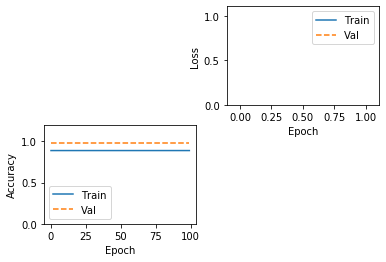

In [39]:
plot_metrics(baseline_history)

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('не пульсар предсказанный как не пульсар : ', cm[0][0])
  print('не пульсар предсказанный как пульсар : ', cm[0][1])
  print('пульсар предсказанный как не пульсар : ', cm[1][0])
  print('Пульсар предсказанный как пульсар : ', cm[1][1])
  print('Всего пульсаров: ', cm[1][0]+cm[1][1])

loss :  nan
accuracy :  0.9849162

не пульсар предсказанный как не пульсар :  1763
не пульсар предсказанный как пульсар :  0
пульсар предсказанный как не пульсар :  27
Пульсар предсказанный как пульсар :  0
Всего пульсаров:  27


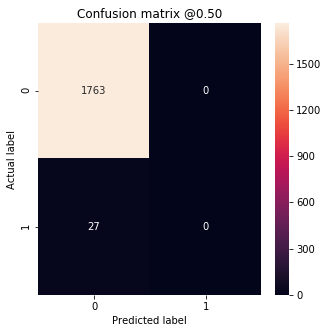

In [41]:
#для данных с feature engeneering


test_predictions_baseline = model.predict(xf_test)

baseline_results = model.evaluate(xf_test, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [42]:
# далее всё тоже самое, только с данными без feature engeneering

In [43]:
#Для данных без feature engeneering

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
model = tf.keras.models.Sequential([

tf.keras.layers.Dense(16, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(32, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
baseline_history1=model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), shuffle=True, class_weight = class_weight)
model.evaluate(x_test, y_test, verbose=0)

Train on 14318 samples, validate on 1790 samples
Epoch 1/100
14318/14318 [==============================] - ETA: 4:18 - loss: 5.4139 - accuracy: 0.68 - ETA: 7s - loss: 9.0309 - accuracy: 0.6304 - ETA: 3s - loss: 7.8034 - accuracy: 0.60 - ETA: 2s - loss: 6.9412 - accuracy: 0.61 - ETA: 1s - loss: 6.2238 - accuracy: 0.61 - ETA: 0s - loss: 5.5760 - accuracy: 0.62 - ETA: 0s - loss: 5.1467 - accuracy: 0.63 - ETA: 0s - loss: 4.6909 - accuracy: 0.64 - ETA: 0s - loss: 4.3634 - accuracy: 0.65 - ETA: 0s - loss: 4.0880 - accuracy: 0.65 - ETA: 0s - loss: 3.8631 - accuracy: 0.65 - 1s 93us/sample - loss: 3.6974 - accuracy: 0.6601 - val_loss: 0.1998 - val_accuracy: 0.9497
Epoch 2/100
14318/14318 [==============================] - ETA: 1s - loss: 0.2806 - accuracy: 0.78 - ETA: 0s - loss: 1.0647 - accuracy: 0.68 - ETA: 0s - loss: 0.9706 - accuracy: 0.69 - ETA: 0s - loss: 1.0890 - accuracy: 0.69 - ETA: 0s - loss: 1.1651 - accuracy: 0.68 - ETA: 0s - loss: 1.0966 - accuracy: 0.68 - ETA: 0s - loss: 1.0633 -

[0.1391720567502123, 0.9782123]

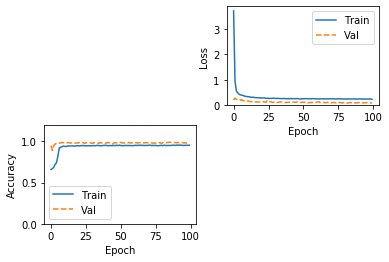

In [44]:
plot_metrics(baseline_history1)

loss :  0.1391720567502123
accuracy :  0.9782123

не пульсар предсказанный как не пульсар :  1728
не пульсар предсказанный как пульсар :  35
пульсар предсказанный как не пульсар :  4
Пульсар предсказанный как пульсар :  23
Всего пульсаров:  27


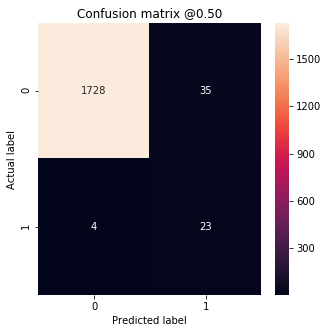

In [45]:
#для данных с feature engeneering


test_predictions_baseline = model.predict(x_test)

baseline_results = model.evaluate(x_test, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [46]:
# далее всё тоже самое, только с центрированными данными

In [47]:
datanorm = pd.read_csv('пульсары центрированные данные.csv', header=None)
#path = 'пульсары нормализованные.csv'
#myfile = open(path, mode = 'a')

In [48]:
datanorm.shape

(17898, 9)

In [49]:
datanorm=datanorm.to_numpy()

In [50]:
a, b, c=np.split(datanorm, [14318,16108])

In [51]:
a_train, b_train=np.hsplit(a, [8]) #нарезаем на тренировку
a_valid, b_valid=np.hsplit(b, [8]) #нарезаем на валидацию
a_test, b_test=np.hsplit(c,[8]) #нарезаем на тест

In [52]:
#модель с центрированными данными
model = tf.keras.models.Sequential([

tf.keras.layers.Dense(16, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(32, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
baseline_history2=model.fit(a_train, b_train, epochs=100, validation_data=(a_valid, b_valid), shuffle=True, class_weight = class_weight)
model.evaluate(a_test, b_test, verbose=0)

Train on 14318 samples, validate on 1790 samples
Epoch 1/100
14318/14318 [==============================] - ETA: 5:19 - loss: 10.0643 - accuracy: 0.281 - ETA: 9s - loss: 6.9593 - accuracy: 0.3548  - ETA: 4s - loss: 5.2996 - accuracy: 0.41 - ETA: 2s - loss: 4.2870 - accuracy: 0.46 - ETA: 1s - loss: 3.6717 - accuracy: 0.49 - ETA: 1s - loss: 3.1946 - accuracy: 0.51 - ETA: 0s - loss: 2.8555 - accuracy: 0.53 - ETA: 0s - loss: 2.6035 - accuracy: 0.54 - ETA: 0s - loss: 2.4009 - accuracy: 0.55 - ETA: 0s - loss: 2.2027 - accuracy: 0.56 - ETA: 0s - loss: 2.0549 - accuracy: 0.58 - ETA: 0s - loss: 1.9145 - accuracy: 0.59 - 1s 101us/sample - loss: 1.9134 - accuracy: 0.5941 - val_loss: 0.1785 - val_accuracy: 0.9888
Epoch 2/100
14318/14318 [==============================] - ETA: 1s - loss: 0.3393 - accuracy: 0.81 - ETA: 0s - loss: 0.6492 - accuracy: 0.74 - ETA: 0s - loss: 0.6281 - accuracy: 0.74 - ETA: 0s - loss: 0.5980 - accuracy: 0.74 - ETA: 0s - loss: 0.5890 - accuracy: 0.74 - ETA: 0s - loss: 0.56

[0.14790406613376553, 0.97988826]

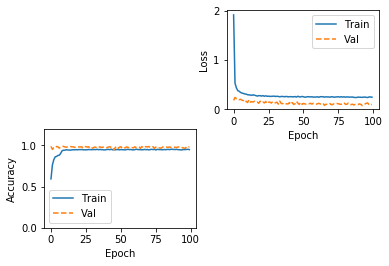

In [53]:
plot_metrics(baseline_history2)

loss :  0.14790406613376553
accuracy :  0.97988826

не пульсар предсказанный как не пульсар :  1731
не пульсар предсказанный как пульсар :  32
пульсар предсказанный как не пульсар :  4
Пульсар предсказанный как пульсар :  23
Всего пульсаров:  27


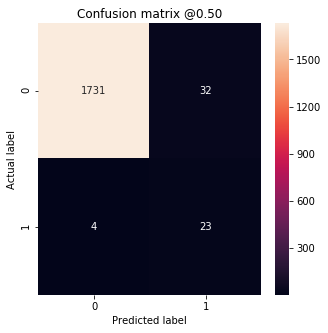

In [54]:
test_predictions_baseline = model.predict(a_test)
baseline_results = model.evaluate(a_test, b_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(b_test, test_predictions_baseline)